<a href="https://colab.research.google.com/github/mabittar/Portfolio/blob/master/Classificador_FakeNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificador de Fake News

Apesar de parecer recente, o termo fake news, ou notícia falsa, em português, é mais antigo do que aparenta. Segundo o dicionário Merriam-Webster, essa expressão é usada desde o final do século XIX. O termo é em inglês, mas se tornou popular em todo o mundo para denominar informações falsas que são publicadas, principalmente, em redes sociais.

Mas o que é Fake News?

Conforme definido pelo site [Mundo Educação](https://mundoeducacao.uol.com.br/curiosidades/fake-news.htm).

Não é de hoje que mentiras são divulgadas como verdades, mas foi com o advento das redes sociais que esse tipo de publicação popularizou-se. A imprensa internacional começou a usar com mais frequência o termo fake news durante a eleição de 2016 nos Estados Unidos, na qual Donald Trump tornou-se presidente. *Fake news é um termo em inglês e é usado para referir-se a falsas informações divulgadas, principalmente, em redes sociais*.

Na época em que Trump foi eleito, algumas empresas especializadas identificaram uma série de sites com conteúdo duvidoso. A maioria das notícias divulgadas por esses sites explorava conteúdos sensacionalistas, envolvendo, em alguns casos, personalidades importantes, como a adversária de Trump, Hillary Clinton.


Qual o impacto das Fakes News?

Um caso que ficou conhecido e chegou ao extremo foi o da dona de casa Fabiane Maria de Jesus, que morreu após ter sido espancada por dezenas de moradores de Guarujá, no litoral de São Paulo, em 2014. A revolta dos moradores foi em virtude de informações publicadas em uma rede social, com um retrato falado de uma possível sequestradora de crianças para rituais de magia negra. A dona de casa foi confundida com a criminosa e acabou linchada por moradores.

Outro boato que tomou conta das redes e influenciou diretamente o calendário de vacinação infantil foi o de que algumas vacinas seriam mortais e teriam matado milhares de crianças. O impacto foi tão grande que doenças como o sarampo, do qual o Brasil era considerado livre, voltaram a acometer crianças.

## O Projeto

Hoje em dia, podemos contar com ferramentas que nos ajudem a identificar e filtrar notícias falsas. Com técnicas de *Machine Learninr* como **Redes Neurais** essa tarefa de vasculhar diversas fontes de notícias para descobrir o que é falso e o que é factual fica mais fácil.

> O objetivo do projeto é treinar um modelo que seja capaz de classificar notícias, com a melhor acurácia possível, entre falsas ou factuais.

Para isso, usaremos a biblioteca ***Tensorflow*** para treinar Redes Neurais que façam esse trabalho por nós.

Nesse notebook irei apresentar os passos para criarmos um identificador de fake news.

<p align=center>
  <img src="https://www.promoview.com.br/uploads/2018/03/images/02.03/fake_news_artigo_1.jpg">

</p>


---
Esse projeto é parte do **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  


<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

Caso você também queria aprender em profundidade esse tema ou outros ligados a Ciência de Dados procure a comunidade Sigmoidal.

---

In [1]:
# importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()

In [2]:
data = "https://www.dropbox.com/s/g9snf1eozls46kq/fake_news.csv?dl=1"

df = pd.read_csv(data)
print(df.shape)

(44898, 5)


In [3]:
#vizualizando os textos importados
df.head()

,title,text,subject,date,Target
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",1
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",1
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",1
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",0
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",1


### Os Dados

Estamos tratando um dataset com aproximadamente 45 mil entradas, divididas em 5 variáveis:
* title: Título do post
* text: Texto da notícia
* subject: Assunto da notícia
* date: data de postagem
* Target: vetor alvo e está dividida em:
 * True (Favtual) = 0
 * False (Falso) = 1 

### Tratando os Dados

Para lidarmos com linguagem natural, precisamos de alguns conhecimentos de NLP para tratar esses dados da melhor forma, para que possam ser passados ao nosso modelo com sucesso e obtermos resultados desejados

In [4]:
### tratando o texto das notícias
import string

def limp_texto(text):
  words = str(text).split()
  words = [i.lower() + "" for i in words]
  words = " ".join(words)
  words = words.translate(words.maketrans('', '', string.punctuation))
  return words

df['text'] = df['text'].apply(limp_texto)
df.head()

,title,text,subject,date,Target
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,donald trump s white house is in chaos and the...,News,"July 21, 2017",1
1,Failed GOP Candidates Remembered In Hilarious...,now that donald trump is the presumptive gop n...,News,"May 7, 2016",1
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,mike pence is a huge homophobe he supports exg...,News,"December 3, 2016",1
3,California AG pledges to defend birth control ...,san francisco reuters california attorney gen...,politicsNews,"October 6, 2017",0
4,AZ RANCHERS Living On US-Mexico Border Destroy...,twisted reasoning is all that comes from pelos...,politics,"Apr 25, 2017",1


Agora, o que precisamos é separar nossos dados em treino, validação e teste.

In [5]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

train, test = train_test_split(df)
train, validation = train_test_split(train, test_size = 0.2)

#verificando  dataset
print("Entradas por Dataset")
print("Dataset de treino:", len(train))
print("Dataset de Validação:", len(validation))
print("dataset de teste:", len(test))

Entradas por Dataset
Dataset de treino: 26938
Dataset de Validação: 6735
dataset de teste: 11225


### Pré-Processamento de Strings - NLP

Aqui neste projeto estamos focando em ***Deep Learning*** e a implementação de **Redes Neurais**, por isso, não iremos nos extender em pré-processamento de Strings.

De qualquer forma, esse é um ponto importante do projeto. Aqui, basicamente o que queremos é simplificar o texto, para que seja mais fácil do nosso modelo processar e entender. Por isso, iremos utilizar uma técnica que se chama ***Tokenizing***.

Em suma, Tokenizing, ou Tokenização, em tradução livre, é um passo que separa longos textos de strings em pedaços de textos mais curtos, chamados de tokens.

<p align=center>
  <img src="https://www.kdnuggets.com/wp-content/uploads/text-tokens-tokenization-manning.jpg" height="30%">
</p>

Para ler mais sobre esse assunto e entender melhor os passos e parâmetros abaixo, deixarei links de referência [aqui](https://www.kdnuggets.com/2017/12/general-approach-preprocessing-text-data.html) e [aqui](https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html).


In [6]:
#importando bilbiotecas necessárias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


vocab_size = 10000
trunc_type = "post"
pad_type = "post"
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train.text)
word_index = tokenizer.word_index

# aplicando técnicas de tokenizing e padding
training_sequences = tokenizer.texts_to_sequences(np.array(train.text))
training_padded = pad_sequences(training_sequences, truncating=trunc_type, padding=pad_type)

max_lenght = len(training_padded[0])

validation_sequences = tokenizer.texts_to_sequences(np.array(validation.text))
validation_padded = pad_sequences(validation_sequences, padding=pad_type, truncating=trunc_type, maxlen = max_lenght)

In [7]:
# criando arrays com inputs

x_train = np.copy(training_padded)
x_val = np.copy(validation_padded)
y_train = train['Target'].values
y_val = validation['Target'].values

# verificando os datasets
print("Tamanho dos datasets")
print("treino: ", len(x_train), "entradas.")
print("respostas: ", len(y_train), "entradas.")

Tamanho dos datasets
treino:  26938 entradas.
respostas:  26938 entradas.


### Preparando, Instanciando e Treinando o Modelo

Agora que nossos dados estão prontos, é hora de ir ao que interessa.

Foi feito um RandomSearch para encontrar os melhores parâmetros, em um processo lento e externo a este notebook, e instanciado um modelo que usa os melhores parâmetros encontrados.

In [8]:
# instanciando e fit no modelo

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, (155), input_length=max_lenght),
                             tf.keras.layers.Conv1D(16, 5, activation='relu'),
                             tf.keras.layers.GlobalMaxPool1D(),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                             ])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001),
              metrics=['accuracy'])

history= model.fit(x_train, y_train, verbose = 2, epochs = 3, validation_data = (x_val, y_val),
                   callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=6)])

Epoch 1/3
842/842 - 81s - loss: 0.0720 - accuracy: 0.9756 - val_loss: 0.0114 - val_accuracy: 0.9963
Epoch 2/3
842/842 - 81s - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.0061 - val_accuracy: 0.9984
Epoch 3/3
842/842 - 81s - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0055 - val_accuracy: 0.9990


Os resultados são bem promissores, apesar de carecerem de uma maior investigação. No entanto, cumpriu o objetivo de demonstrar o poder das Redes Neurais.


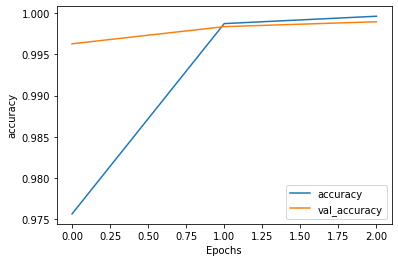

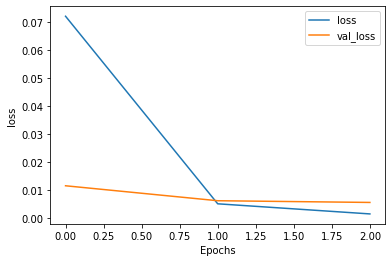

In [11]:
# visualizando os resultados
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Fazendo Previsões no Conjunto de Teste

Por fim, temos o pipeline ideal para tratar nossos dados, já treinamos, tunamos e obtivemos excelentes resultados em nosso conjunto de validação. Nosso modelo está pronto, mas ele tem mais uma missão a cumprir. 

Vamos apresentar dados completamente novos a ele, fazer previsõs e ver como ele se sai.

In [13]:
# tratando os dados de teste
test_sequences = tokenizer.texts_to_sequences(np.array(test.text))
test_padded = pad_sequences(test_sequences, padding=pad_type, truncating=trunc_type, maxlen = max_lenght)

# fazendo previsões
preds = np.round(model.predict(test_padded))

# check do tamanho
len(preds)

11225

In [18]:
# verificando a acurácia
acc = np.sum(1 if i==j else 0 for i,j in zip(preds, test["Target"].values)) / len(test)
print("Accuracy: ", acc )

Accuracy:  0.9984855233853007


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  
